In [36]:
pip install feedparser

### **NOTICIAS: RPP**

In [50]:
import pandas as pd

# URL del feed RSS de RPP Economía
rss_url = "https://rpp.pe/feed/economia"

# Parsear el feed
feed = feedparser.parse(rss_url)

# Mostrar información general del feed
print(f"Título del feed: {feed.feed.title}\n")

# Crear una lista para almacenar los datos de las entradas
data = []

# Recorrer las entradas del feed y extraer la información relevante
for entry in feed.entries:
    data.append({
        'title': entry.title,
        'summary': entry.summary,
        'published': entry.published,
        'link': entry.link
        # Agrega otros campos según sea necesario
    })

# Crear un DataFrame de pandas con los datos
df = pd.DataFrame(data)

# Calcular la tasa de completitud por columna
tasa_completitud = df.notnull().mean() * 100

# Mostrar la tasa de completitud de cada columna
print("Tasa de completitud por columna:")
print(tasa_completitud)

# Calcular la tasa de completitud global del DataFrame
tasa_completitud_total = df.notnull().sum().sum() / df.size * 100

# Mostrar la tasa de completitud total
print(f"\nTasa de completitud total: {tasa_completitud_total:.2f}%")




Título del feed: RPP NOTICIAS

Tasa de completitud por columna:
title        100.0
summary      100.0
published    100.0
link         100.0
dtype: float64

Tasa de completitud total: 100.00%


### **ANDINA**

In [54]:
# Obtener las noticias desde la API https://andina.pe/RSS/economia.xml y seleccionar aquellas noticias, de los últimos 2 años, relacionadas a la economía del Perú

import pandas as pd
import feedparser
from datetime import datetime, timedelta

# URL del feed RSS de Andina Economía
rss_url = "https://andina.pe/RSS/economia.xml"

# Parsear el feed
feed = feedparser.parse(rss_url)

# Crear una lista para almacenar los datos de las entradas
data_andina = []

# Recorrer las entradas del feed y extraer la información relevante
for entry in feed.entries:
    try:
        published_parsed = entry.published_parsed
        # Check if published_parsed is not None before slicing
        if published_parsed is not None:
            published_date = datetime(*published_parsed[:6])
        else:
            # Handle the case when published_parsed is None, e.g., skip the entry or use a default date
            print(f"Skipping entry with missing published date: {entry.title}")
            # Instead of continuing, assign a default date
            published_date = datetime.now() # You can use a more appropriate default if needed
            #continue  # Skip this entry and proceed to the next one

        data_andina.append({
            'title': entry.title,
            'summary': entry.summary,
            'published': published_date,
            'link': entry.link
        })
    except AttributeError:
        print(f"Error processing entry: {entry.title}")
        continue

# Crear un DataFrame de pandas con los datos (Andina)
df_andina = pd.DataFrame(data_andina)

# Calcular la fecha de hace dos años
two_years_ago = datetime.now() - timedelta(days=730)

# Filtrar noticias de los últimos dos años
df_andina = df_andina[df_andina['published'] >= two_years_ago]


# Filtrar noticias relacionadas a la economía del Perú (Andina)
keywords = ["economía", "Perú", "PBI", "inflación", "BCRP", "MEF", "moneda", "deuda", "inversión", "crecimiento económico"]
df_andina_filtered = df_andina[df_andina['title'].str.contains('|'.join(keywords), case=False) |
                              df_andina['summary'].str.contains('|'.join(keywords), case=False)]

# Mostrar el DataFrame filtrado (Andina)
print("\nNoticias de Andina relacionadas a la economía del Perú en los últimos dos años:")
df_andina_filtered

df=df_andina_filtered

# Calcular la tasa de completitud por columna
tasa_completitud = df.notnull().mean() * 100

# Mostrar la tasa de completitud de cada columna
print("Tasa de completitud por columna:")
print(tasa_completitud)

# Calcular la tasa de completitud global del DataFrame
tasa_completitud_total = df.notnull().sum().sum() / df.size * 100

# Mostrar la tasa de completitud total
print(f"\nTasa de completitud total: {tasa_completitud_total:.2f}%")

Skipping entry with missing published date: MVCS: Limpieza de cauces y drenes beneficiará a más de 160,000 pobladores
Skipping entry with missing published date: MEM exhorta al diálogo a pobladores de Chumbivilcas para lograr soluciones
Skipping entry with missing published date: Ministro Alfonso Grados: MTPE reforzará formalización de mypes
Skipping entry with missing published date: Habilitan registro con información de más de un millón de empresas
Skipping entry with missing published date: Asbanc: Crédito bancario a nivel nacional crece 4.2% a setiembre
Skipping entry with missing published date: Gamarra: Gobierno hace más flexible marco legal para Mypes
Skipping entry with missing published date: MTPE presentará ajustes a escalas de multas de Sunafil ante CNTPE
Skipping entry with missing published date: MEF: Régimen Mype tributario beneficiará a 700,000 contribuyentes
Skipping entry with missing published date: Apemives: Mypes ya piensan en formalizarse tras medidas del Gobierno


### **GESTION**

In [56]:
# URL del feed RSS de Agencia Andina - Economía
rss_url = "https://gestion.pe/rss"

# Parsear el feed
feed = feedparser.parse(rss_url)

# Asegurarse de que hay entradas
if feed.entries:
    first_entry = feed.entries[0]
    print("Campos disponibles en la primera entrada:\n")
    for key in first_entry.keys():
        print("-", key)
else:
    print("No hay entradas en el feed.")


# Crear una lista para almacenar los datos de las entradas
data = []

# Recorrer las entradas del feed
for entry in feed.entries:
    data.append({
        'title': entry.title,
        'summary': entry.summary,
        'published': entry.published,
        'link': entry.link
    })

# Crear un DataFrame de pandas con los datos (Andina)
df = pd.DataFrame(data)


# Calcular la tasa de completitud por columna
tasa_completitud = df.notnull().mean() * 100

# Mostrar la tasa de completitud de cada columna
print("Tasa de completitud por columna:")
print(tasa_completitud)

# Calcular la tasa de completitud global del DataFrame
tasa_completitud_total = df.notnull().sum().sum() / df.size * 100

# Mostrar la tasa de completitud total
print(f"\nTasa de completitud total: {tasa_completitud_total:.2f}%")



No hay entradas en el feed.
Tasa de completitud por columna:
Series([], dtype: float64)

Tasa de completitud total: nan%


<ipython-input-56-76eb961be957>:41: RuntimeWarning: invalid value encountered in scalar divide
  tasa_completitud_total = df.notnull().sum().sum() / df.size * 100


### **NEW API**

In [58]:
# API Key: 8bccc5cb5cd64fdab5208e19ea1a22fa

import requests
import pandas as pd

url = "https://newsapi.org/v2/everything"
params = {
    'q': 'noticias económicas Perú',
    'language': 'es',
    'apiKey': '8bccc5cb5cd64fdab5208e19ea1a22fa'
}
response = requests.get(url, params=params)
data = response.json()

# Convertir a DataFrame
df = pd.DataFrame(data['articles'])
print(df[['title', 'description', 'url']])

# Calcular la tasa de completitud por columna
tasa_completitud = df.notnull().mean() * 100

# Mostrar la tasa de completitud de cada columna
print("Tasa de completitud por columna:")
print(tasa_completitud)

# Calcular la tasa de completitud global del DataFrame
tasa_completitud_total = df.notnull().sum().sum() / df.size * 100

# Mostrar la tasa de completitud total
print(f"\nTasa de completitud total: {tasa_completitud_total:.2f}%")




                                               title  \
0  Fiscalía pide 15 años y medio para expresident...   
1  Sheinbaum, Milei y Bukele, los líderes latinoa...   
2  México impone cuotas e inicia investigaciones ...   
3  Pura vida: México y Costa Rica ingresan al top...   
4  Milei, Sheinbaum y Bukele, los líderes latinoa...   
5  ¿Cómo te afectan los aranceles recíprocos de T...   
6  Brasil e India se destacan en medio de cambios...   
7  Efecto apagón, guerra comercial y mayores gast...   
8  La incertidumbre en EEUU es buena para Brasil,...   
9  La Crisis Mundial del Coronavirus. Golpe de Es...   

                                         description  \
0  Fernando Dávila Moreno \r\nLa Fiscalía Anticor...   
1  Forbes México.\n Sheinbaum, Milei y Bukele, lo...   
2  La Secretaría de Economía señaló que con estas...   
3  Forbes México.\n Pura vida: México y Costa Ric...   
4  Javier Milei, Claudia Sheinbaum y Nayib Bukele...   
5  La nueva ofensiva comercial de Donald Trump 

### **API de temperatura**

In [59]:
import requests
import pandas as pd
from datetime import datetime

# Coordenadas por región (capitales)
regiones_peru = {
    "Amazonas": (-6.23, -77.87),
    "Áncash": (-9.53, -77.53),
    "Apurímac": (-14.07, -72.88),
    "Arequipa": (-16.4, -71.53),
    "Ayacucho": (-13.16, -74.22),
    "Cajamarca": (-7.16, -78.5),
    "Callao": (-12.05, -77.15),
    "Cusco": (-13.52, -71.97),
    "Huancavelica": (-12.8, -74.98),
    "Huánuco": (-9.93, -76.24),
    "Ica": (-14.07, -75.73),
    "Junín": (-11.15, -75.98),
    "La Libertad": (-8.11, -78.03),
    "Lambayeque": (-6.7, -79.9),
    "Lima": (-12.04, -77.03),
    "Loreto": (-3.75, -73.25),
    "Madre de Dios": (-11.5, -69.2),
    "Moquegua": (-17.19, -70.93),
    "Pasco": (-10.68, -75.27),
    "Piura": (-5.2, -80.63),
    "Puno": (-15.84, -70.03),
    "San Martín": (-6.43, -76.52),
    "Tacna": (-18.01, -70.25),
    "Tumbes": (-3.57, -80.45),
    "Ucayali": (-8.38, -74.57)
}

# Fechas de inicio y fin para los últimos 2 años
start_date = (datetime.today().replace(day=1) - pd.DateOffset(years=2)).strftime("%Y-%m-%d")
end_date = datetime.today().strftime("%Y-%m-%d")

# Función para obtener los datos diarios de temperatura de una región
def obtener_temperatura_region(nombre, lat, lon):
    url = (
        f"https://archive-api.open-meteo.com/v1/archive?"
        f"latitude={lat}&longitude={lon}&start_date={start_date}&end_date={end_date}"
        f"&daily=temperature_2m_max,temperature_2m_min&timezone=America%2FLima"
    )
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        df = pd.DataFrame(data["daily"])
        df["temperature_2m_mean"] = (df["temperature_2m_max"] + df["temperature_2m_min"]) / 2
        df["region"] = nombre
        return df
    except Exception as e:
        print(f"Error en {nombre}: {e}")
        return pd.DataFrame()

# Recolectar datos de todas las regiones
dfs = []
for region, (lat, lon) in regiones_peru.items():
    # print(f"Procesando {region}...")
    df_region = obtener_temperatura_region(region, lat, lon)
    dfs.append(df_region)

# Unir todos los dataframes
df_todo_peru = pd.concat(dfs, ignore_index=True)

# Ver primeras filas
#print(df_todo_peru.head())

df=df_todo_peru

# Calcular la tasa de completitud por columna
tasa_completitud = df.notnull().mean() * 100

# Mostrar la tasa de completitud de cada columna
print("Tasa de completitud por columna:")
print(tasa_completitud)

# Calcular la tasa de completitud global del DataFrame
tasa_completitud_total = df.notnull().sum().sum() / df.size * 100

# Mostrar la tasa de completitud total
print(f"\nTasa de completitud total: {tasa_completitud_total:.2f}%")



Tasa de completitud por columna:
time                   100.000000
temperature_2m_max      99.728261
temperature_2m_min      99.728261
temperature_2m_mean     99.728261
region                 100.000000
dtype: float64

Tasa de completitud total: 99.84%


In [105]:
df_todo_peru.head()

,time,temperature_2m_max,temperature_2m_min,temperature_2m_mean,region
0,2023-04-01,19.4,9.3,14.35,Amazonas
11776,2023-04-01,28.9,21.3,25.10,Madre de Dios
14720,2023-04-01,12.2,6.3,9.25,Puno
6624,2023-04-01,21.2,16.4,18.80,Huánuco
16928,2023-04-01,28.0,23.4,25.70,Tumbes


### **Análisis de Continuidad temporal - Temperatura**
Verificamos la continuidad temporal del DataFrame de Temperatura ya que se trata de una serie de tiempo. Esto lo realizamos porque los modelos de serie de tiempo como ARIMA, LSTM, etc. asumen una frecuencia regular de datos (diaria, semanal, mensual) y si hay "huecos" en el tiempo, el modelo puede sobreajustar (overfitting), generar errores an entrenar o predecir y terminar dando resultados sesgados o engañosos.

In [104]:
# Realizamos un análisis de continuidad temporal del dataframe de Temperatura

import pandas as pd

# Convert the 'time' column to datetime objects
df_todo_peru['time'] = pd.to_datetime(df_todo_peru['time'])

# Sort the DataFrame by the 'time' column
df_todo_peru = df_todo_peru.sort_values('time')

# Check for missing dates within the time range.
# Find the minimum and maximum dates.
min_date = df_todo_peru['time'].min()
max_date = df_todo_peru['time'].max()

# Create a complete date range.
complete_date_range = pd.date_range(start=min_date, end=max_date, freq='D')

# Identify missing dates.
missing_dates = complete_date_range.difference(df_todo_peru['time'])

# Print missing dates, or indicate that there are none.
if missing_dates.empty:
    print("No missing dates found in the 'time' column.")
else:
    print("Missing dates:")
    print(missing_dates)

# Analyze the temporal continuity for each region. (Optional, but recommended).
for region in df_todo_peru['region'].unique():
    region_data = df_todo_peru[df_todo_peru['region'] == region]
    min_date_region = region_data['time'].min()
    max_date_region = region_data['time'].max()
    complete_date_range_region = pd.date_range(start=min_date_region, end=max_date_region, freq='D')
    missing_dates_region = complete_date_range_region.difference(region_data['time'])

    if not missing_dates_region.empty:
        print(f"\nMissing dates in region '{region}':")
missing_dates_region


No missing dates found in the 'time' column.


DatetimeIndex([], dtype='datetime64[ns]', freq='D')

## **Observamos que el dataframe de Temperatura no tiene huecos o valores omisos.**

# **Tipo de cambio**

Consideramos el tipo de cambio interbancario diario (venta) porque es el que afecta directamente los costos de las empresas importadores y exportadoras.

In [101]:
import requests

url_base="https://estadisticas.bcrp.gob.pe/estadisticas/series/api/"
codigo_serie="PD04638PD"
formato="/json"
per="/2023-03-31/2025-03-31"

url=url_base+codigo_serie+formato+per
#print(url)

response=requests.get(url)
#print(response)

#Extraemos en formato json
response_json=response.json()
#print(response_json)

#for key in response_json.keys():
#    print(key)

#print(response_json['config'])
#print(response_json['periods'])

# Extraemos los valores del tipo de cambio
periodos=response_json.get('periods')
tc=[]
for i in periodos:
  valores_list=i['values']
  for w in valores_list:
      tc.append(w)

tc = [None if x == "n.d." else float(x) for x in tc]

# Extraemos las fechas del tipo de cambio
fechas=[]
for i in periodos:
  nombre=i['name']
  fechas.append(nombre)

# Creamos el diccionario de datos
diccionario={'fecha':fechas,'tipo_cambio':tc}

# Creamos el Dataframe
df=pd.DataFrame(diccionario)
#df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')
#df['fecha'] = pd.to_datetime(df['fecha'], format='%d.%b.%y', errors='coerce')
#df

# Calcular la tasa de completitud por columna
tasa_completitud = df.notnull().mean() * 100

# Mostrar la tasa de completitud de cada columna
print("Tasa de completitud por columna:")
print(tasa_completitud)

# Calcular la tasa de completitud global del DataFrame
tasa_completitud_total = df.notnull().sum().sum() / df.size * 100

# Mostrar la tasa de completitud total
print(f"\nTasa de completitud total: {tasa_completitud_total:.2f}%")


# Verificar valores nulos
nulos = df["tipo_cambio"].isnull().sum()
print(f"🔍 Valores nulos: {nulos}")

# Verificar duplicados
duplicados = df.duplicated(subset="fecha").sum()
print(f"🔁 Registros duplicados por fecha: {duplicados}")

# Verificar valores fuera de rango (esperado entre 2.5 y 5.0)
fuera_de_rango = df[(df["tipo_cambio"] < 2.5) | (df["tipo_cambio"] > 5.0)]
print(f"⚠️ Valores fuera de rango lógico: {len(fuera_de_rango)}")

df.head()

Tasa de completitud por columna:
fecha          100.000000
tipo_cambio     95.019157
dtype: float64

Tasa de completitud total: 97.51%
🔍 Valores nulos: 26
🔁 Registros duplicados por fecha: 0
⚠️ Valores fuera de rango lógico: 0


,fecha,tipo_cambio
0,31.Mar.23,3.762833
1,03.Abr.23,3.768000
2,04.Abr.23,3.772833
3,05.Abr.23,3.772000
4,06.Abr.23,NaN


### **Análisis de Continuidad temporal - Tipo de cambio**
Verificamos la continuidad temporal del DataFrame de Tipo de Cambio ya que se trata de una serie de tiempo. Esto lo realizamos porque los modelos de serie de tiempo como ARIMA, LSTM, etc. asumen una frecuencia regular de datos (diaria, semanal, mensual) y si hay "huecos" en el tiempo, el modelo puede sobreajustar (overfitting), generar errores an entrenar o predecir y terminar dando resultados sesgados o engañosos.

Gaps in the time series:
         fecha  tipo_cambio date_diff
21  2023-05-01          NaN   31 days
26  2023-05-08     3.706000    3 days
31  2023-05-15     3.663333    3 days
36  2023-05-22     3.692167    3 days
41  2023-05-29     3.674333    3 days
..         ...          ...       ...
501 2025-03-03     3.685833    3 days
506 2025-03-10     3.663833    3 days
511 2025-03-17     3.646833    3 days
516 2025-03-24     3.646333    3 days
521 2025-03-31     3.670833    3 days

[64 rows x 3 columns]


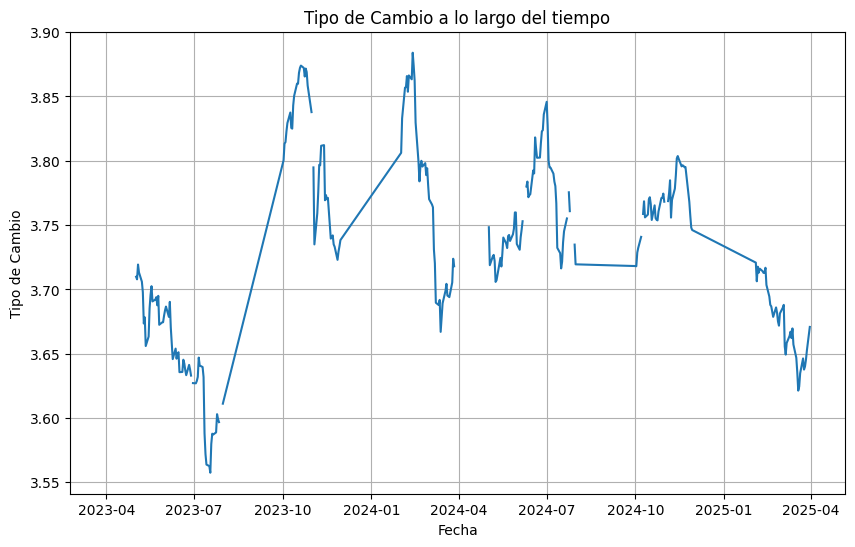

In [102]:
# Realizamos un análisis de continuidad temporal para el dataframe de Tipo de cambio

# Convert the 'fecha' column to datetime objects.
# The current format is not recognized by pandas directly, so we need a custom function.

import pandas as pd

def custom_date_parser(date_str):
    """Parses dates in the format 'DD.MMM.YY'."""
    try:
        return pd.to_datetime(date_str, format='%d.%b.%y')
    except ValueError:
        return pd.NaT  # Return Not a Time for invalid dates

df['fecha'] = df['fecha'].apply(custom_date_parser)

# Now we can analyze the temporal continuity.

# Check for missing dates:
# Calculate the difference between consecutive dates.
df = df.sort_values('fecha')
df['date_diff'] = df['fecha'].diff()

# Identify gaps in the time series.
gaps = df[df['date_diff'] > pd.Timedelta(days=1)]

# Print the detected gaps.
print("Gaps in the time series:")
print(gaps)

# You could also visualize the time series to identify trends and patterns:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df['fecha'], df['tipo_cambio'])
plt.xlabel('Fecha')
plt.ylabel('Tipo de Cambio')
plt.title('Tipo de Cambio a lo largo del tiempo')
plt.grid(True)
plt.show()


Observamos que existen algunos huecos o valores omisos en la serie de tiempo de Tipo de cambio, por lo que corresponderá analizar su hay patrones (por ejemplo falta de datos los domingos o fines de mes), cuántos valores omisos hay y de qué fechas son, etc. En este caso, la técnica más adecuada para completar los valores omisos sería la **interpolación** ya que se trata de la variable "Tipo de Cambio" cambia de forma contínua en el tiempo.

In [112]:
# Completar los huecos de df utilizando interpolación

# Interpola los valores faltantes en la columna 'tipo_cambio'
df['tipo_cambio'] = df['tipo_cambio'].interpolate(method='linear')

# Verificar si aún existen valores nulos después de la interpolación
nulos_despues_interpolacion = df["tipo_cambio"].isnull().sum()
print(f"Valores nulos después de la interpolación: {nulos_despues_interpolacion}")


Valores nulos después de la interpolación: 0


Gaps in the time series:
         fecha  tipo_cambio date_diff
21  2023-05-01     3.736333   31 days
26  2023-05-08     3.706000    3 days
31  2023-05-15     3.663333    3 days
36  2023-05-22     3.692167    3 days
41  2023-05-29     3.674333    3 days
..         ...          ...       ...
501 2025-03-03     3.685833    3 days
506 2025-03-10     3.663833    3 days
511 2025-03-17     3.646833    3 days
516 2025-03-24     3.646333    3 days
521 2025-03-31     3.670833    3 days

[64 rows x 3 columns]


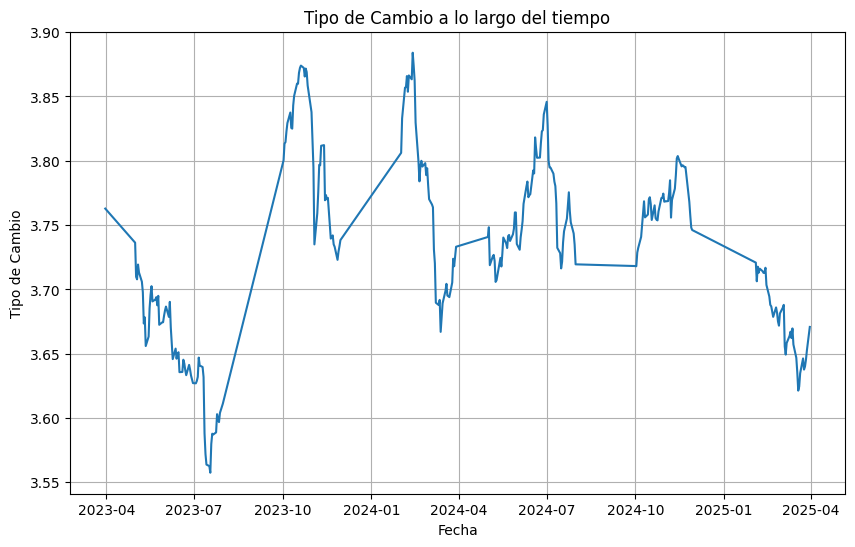

In [113]:
# Realizamos un nuevo análisis de continuidad temporal para el dataframe de Tipo de cambio

# Convert the 'fecha' column to datetime objects.
# The current format is not recognized by pandas directly, so we need a custom function.

import pandas as pd

def custom_date_parser(date_str):
    """Parses dates in the format 'DD.MMM.YY'."""
    try:
        return pd.to_datetime(date_str, format='%d.%b.%y')
    except ValueError:
        return pd.NaT  # Return Not a Time for invalid dates

df['fecha'] = df['fecha'].apply(custom_date_parser)

# Now we can analyze the temporal continuity.

# Check for missing dates:
# Calculate the difference between consecutive dates.
df = df.sort_values('fecha')
df['date_diff'] = df['fecha'].diff()

# Identify gaps in the time series.
gaps = df[df['date_diff'] > pd.Timedelta(days=1)]

# Print the detected gaps.
print("Gaps in the time series:")
print(gaps)

# You could also visualize the time series to identify trends and patterns:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df['fecha'], df['tipo_cambio'])
plt.xlabel('Fecha')
plt.ylabel('Tipo de Cambio')
plt.title('Tipo de Cambio a lo largo del tiempo')
plt.grid(True)
plt.show()

## **Una vez aplicada la interpolación, vemos que la serie de tiempo ya no tiene huecos**